 # Practice 1 :
 ### Purpose : 
 To practice the basic usage of curve_fit in scipy.optimize.

### Task : 
 Generate a set of data points defined by a function $$y = a*x + b + noise$$ with `x = np.linspace(1, 10, 10)`
 The noise is sampled from a normal distribution with `mean = 0` and `standard deviation = sigma0.(define sigma0 whatever you like)`
 Use the curve_fit function in scipy.optimize to fit the data points with the function `y = a*x + b`.
 Plot the data points and the fitting curve.
 Calculate the residuals and plot the residuals.

In [10]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#this creates a base linear function  y = ax + b with three parameters x, a, and b
#this function will be used to fit the data
def func(x, a, b):
    return a*x + b

In [12]:
a = 3 # slope
b = 2  # intercept
sigma0 = 3 # standard deviation of the noise

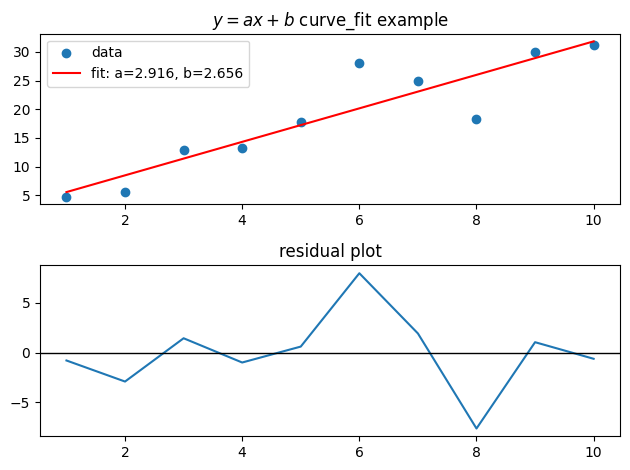

In [13]:
x = np.linspace(1, 10, 10) # x values ranging from 1 to 10 with 10 points

y = func(x, a, b) + np.random.normal(0, sigma0, len(x)) # this is where noise is added to the base linear function

popt, pcov = curve_fit(func, x, y) # this is where the curve fitting is done
# popt is the optimal values for the parameters a and b that minimize the sum of the squared residuals
# pcov is the estimated covariance of popt which can be used to calculate the standard deviation of the parameters

fig, ax = plt.subplots(2, 1) # create a figure with two subplots

ax[0].scatter(x, y) # plot the data points as a scatter plot on the first subplot  ax[0] 
ax[0].plot(x, func(x, *popt), 'r-') # plot the fitted curve on the same subplot ax[0]
ax[0].legend(['data', 'fit: a=%5.3f, b=%5.3f' % tuple(popt)]) # add a legend to the plot with the fitted parameters
ax[0].set_title('$y = ax+b$ curve_fit example') # add a title to the plot 
ax[1].plot(x, y-func(x, *popt)) # plot the residuals on the second subplot ax[1]
ax[1].axhline(0, color='black', lw=1) # add a horizontal line at y=0 to the plot
ax[1].set_title('residual plot') # add a title to the plot
fig.tight_layout()# adjust the layout of the plots
plt.show() # show the plots

### Debug Log

#### Error 1
```python
  Cell In[102],   line 18
    fig.tight_layout()# adjust the layout of the plots
    ^
IndentationError: unexpected indent
```
There was an unnecessary indent on line 18. This was fixed by removing the unnecessary tab.

#### Error 2
```python
  Cell In[2],   line 3
    def func(x a, b):
               ^
SyntaxError: invalid syntax
```

There was no comma separating the different parameters `x, a, b`, which looked like `def func(x a, b):` This was easily fixed by the addition of the comma, `def func(x, a, b):`


### Results and Explanations:   
Keep in mind the output is generated randomly, so the values might differ from the ones shown here.

![Fitted Curve and Residual Plot](./pictures/ch2-curve_fit_and_residual_plots.png)

The first plot observed is a scatter plot of the original linear equation with noise introduced. using curve fitting it was able to come up with a linear model `y = ax + b` which best fitted the scatter plots. 

$$a = 2.164$$
$$b = 5.681$$

are the values of parameters the slope and intercept respectively that best fitted the scattered plots, which can be seen from the first graph.

the second plot shows that of the residual plot, which is the difference between the scattered points and the points on the best fitting linear equation. as can be seen from the graph it fluctuated around zero.


 # Practice 2:

 ### Purpose: 

- To read out the data from a csv file.
- To store the data properly for further analysis.

### Task: 
- Read out the data from a csv file.
- Plot the data points.
- The following is an example of how to read out the data from a csv file.
- You can modify the code to read out the data from the file you have.

In [14]:
path = r"data.csv" #this data is from our first semester experimental physics class
try:
    data = np.loadtxt(path, skiprows=1, usecols=(0, 1), max_rows=11, delimiter=',')  # setting proper skiprows, usecols, max_rows to read data
except:
    pass

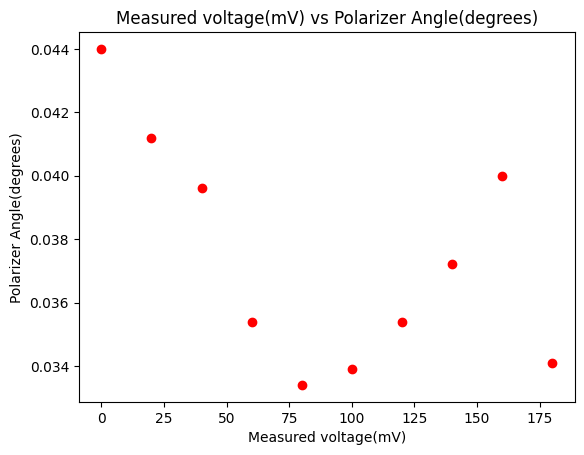

In [15]:

# Plot the data points.
plt.plot(data[:, 0], data[:, 1], 'ro') # plot the data points as cirles
plt.xlabel('Measured voltage(mV)') # add x label
plt.ylabel('Polarizer Angle(degrees)') # add y label
plt.title('Measured voltage(mV) vs Polarizer Angle(degrees)') # add title
plt.show()

![measured voltage and polarizer angle](./pictures/ch2-voltage_vs_angle.png)

The experiment from last semester, which measured the voltage as the polarizer angles changed, is the source of the data above. Python was used to read and visualize the data, which was saved in a CSV file.

In [16]:
print('x shape:', x.shape) # print the shape of x
print('y shape:', y.shape) # print the shape of y
print('y mean:', np.mean(y, axis=0)) # print the mean of y

x shape: (10,)
y shape: (10,)
y mean: 18.694387409000246


### Debug log

#### Error 1

```python
path = r"data.csv" #this data is from our first semester experimental physics class
try:
    data = np.loadtxt(path, skiprows=1, usecols=(0, 1), max_rows=11 delimiter=',')  # setting proper skiprows, usecols, max_rows to read data
except:
    pass
```
this error was caused by a typo `data = np.loadtxt(path skiprows=1, usecols=(0, 1), max_rows=11, delimiter=',')` I have forgotten to put a comma spearating the parameters, it was fixed by adding a  comma which is `data = np.loadtxt(path, skiprows=1, usecols=(0, 1), max_rows=11, delimiter=',')`

#### Error 2

```python
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[9], line 2
      1 # Plot the data points.
----> 2 plt.plot(data[:, 0], data[:, 1], 'ro') # plot the data points as cirles
      3 plt.xlabel('Measured voltage(mV)') # add x label
      4 plt.ylabel('Polarizer Angle(degrees)') # add y label

NameError: name 'data' is not defined
```

the path for the csv file was wrong another typo error the name was `path = r"dat.csv"`, this was fixed by inputting the correct name for the csv file `path = r"data.csv"` 

### Summary of This Week:

In the first part of the exercise, I found it interesting to perform linear regression using the SciPy library, as I am not very familiar with it. It was a great opportunity for me to learn, and while exploring the documentation, I discovered that SciPy offers various curve-fitting techniques beyond just linear regression.

For the second part of the exercise, it was my first time seeing Python read a CSV file. I found it fascinating to manipulate the data and select specific data points from the file. I can see many practical applications for this, especially in automating various tasks.